# SHAIK JAVEED
# DATA SCIENCE & BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION
# TASK - 4 Exploratory Data Analysis - Terrorism

Hey everyone! This is an EDA project in which we have to perform analyse the ‘Global Terrorism’ dataset.

As a security/defense analyst, try to find out the hot zone of terrorism.
What all security issues and insights you can derive by EDA?

This video will guide you through the process of fetching answers to all these questions.

Let us get started!

# Importing required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


# Importing Dataset

In [2]:
data=pd.read_csv('../input/gtd/globalterrorismdb_0718dist.csv', dtype='unicode')

In [4]:
pd.set_option('display.max_columns', 135)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.shape

(181691, 135)

In [7]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Renaming Columns

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday': 'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','targsubtype1_txt':'Target_sub_type','weaptype1_txt':'Weapon','nkill':'Kill','gname':'Group','nwound':'Wound'},inplace=True)

In [9]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attack_Type,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_Type,targsubtype1,Target_sub_type,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68,Named Civilian,NaN,Julio Guzman,58,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN,Mexico,1,800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54,Radio Journalist/Staff/Facility,Voice of America,Employee,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46,Embassy/Consulate,NaN,U.S. Embassy,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1970

In [10]:
terror=data[['Year','Month','Day','Country','State','City','Region','Attack_Type','Target_Type','Target_sub_type','Kill', 'Wound','target1','summary','Group','Weapon']]

In [11]:
terror.head()

,Year,Month,Day,Country,State,City,Region,Attack_Type,Target_Type,Target_sub_type,Kill,Wound,target1,summary,Group,Weapon
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,1,0,Julio Guzman,NaN,MANO-D,Unknown
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1,0,Employee,NaN,Unknown,Unknown
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary


In [12]:
terror.shape

(181691, 16)

# Understanding the Missing Value Data

In [13]:
terror.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
State                421
City                 434
Region                 0
Attack_Type            0
Target_Type            0
Target_sub_type    10373
Kill               10313
Wound              16311
target1              636
summary            66129
Group                  0
Weapon                 0
dtype: int64

In [14]:
terror.fillna(0,inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State              0
City               0
Region             0
Attack_Type        0
Target_Type        0
Target_sub_type    0
Kill               0
Wound              0
target1            0
summary            0
Group              0
Weapon             0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
terror.describe()

,Year,Month,Day,Country,State,City,Region,Attack_Type,Target_Type,Target_sub_type,Kill,Wound,target1,summary,Group,Weapon
count,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691
unique,47,13,32,205,2855,36675,12,9,22,113,206,239,86007,112493,3537,12
top,2014,5,15,Iraq,Baghdad,Unknown,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,0,0,Civilians,0,Unknown,Explosives
freq,16903,16875,6500,24636,7645,9775,50474,88255,43511,11596,88149,103275,6461,66129,82782,92426


# Number of Attacks Each Year

In [18]:
terror['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

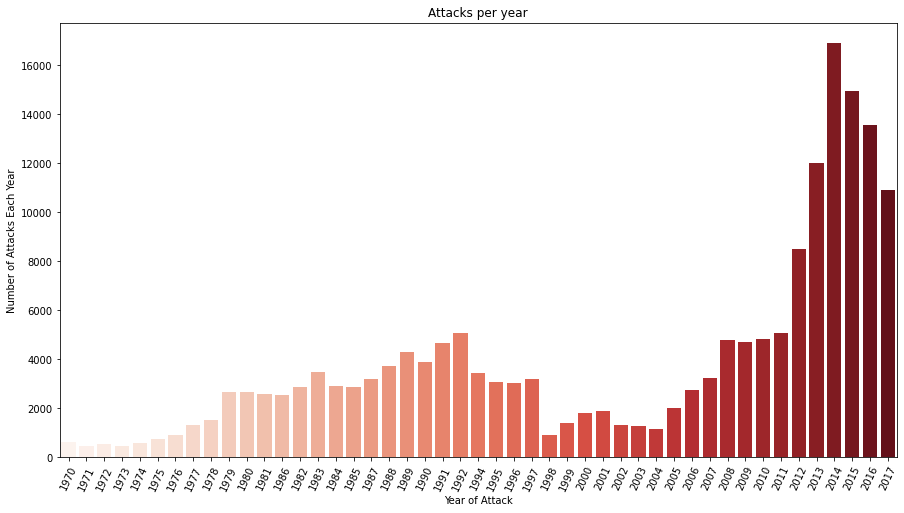

In [27]:
year=terror['Year'].unique()
number_of_attacks_eachyear = terror['Year'].value_counts().sort_index()
plt.figure(figsize=(15,8))
sns.barplot(x=year,y=number_of_attacks_eachyear,palette = 'Reds')
plt.xticks(rotation=65)
plt.xlabel("Year of Attack")
plt.ylabel("Number of Attacks Each Year")
plt.title("Attacks per year")
plt.show()

# Most Attacks on a Country

In [20]:
terror['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

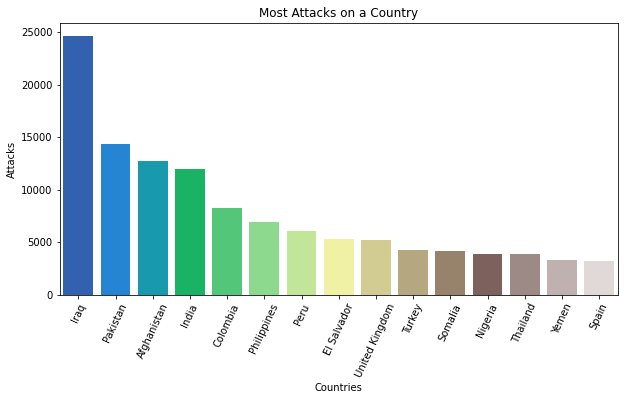

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=terror['Country'].value_counts()[:15].index,y=terror['Country'].value_counts().values[:15],palette='terrain')
plt.xticks(rotation=65)
plt.xlabel('Countries')
plt.ylabel('Attacks')
plt.title('Most Attacks on a Country')
plt.show()

# Most attacks on a Region

In [22]:
terror['Region'].value_counts().head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

(array([], dtype=float64), [])

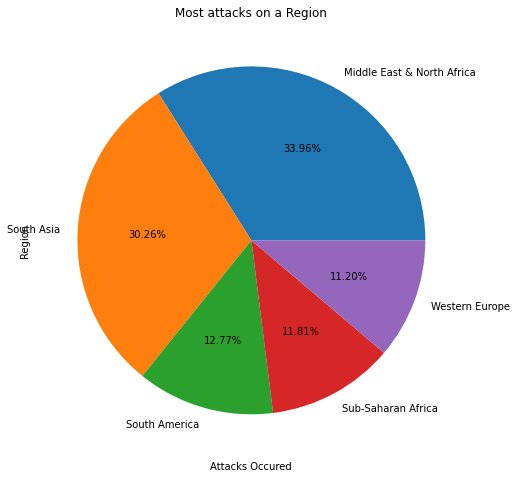

In [23]:
terror['Region'].value_counts().head().plot(kind = 'pie', figsize = (15,8), fontsize=10,autopct='%1.2f%%',textprops = {"fontsize":15})
plt.xlabel("Attacks Occured", size = 10)
plt.title("Most attacks on a Region")
plt.xticks(size = 10)
plt.yticks(size = 10)

# Trend of Deaths

Text(0, 0.5, 'Total deaths')

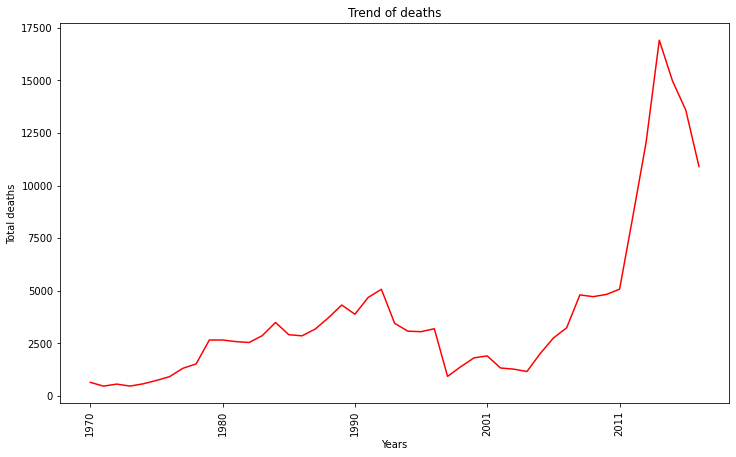

In [24]:
plt.subplots(figsize=(12,7))
terror.groupby(['Year']).count()['Kill'].plot(color = 'red')
plt.xticks(rotation=90)
plt.title("Trend of deaths")
plt.xlabel("Years")
plt.ylabel("Total deaths")

# Types of Weapon most used for an Attack

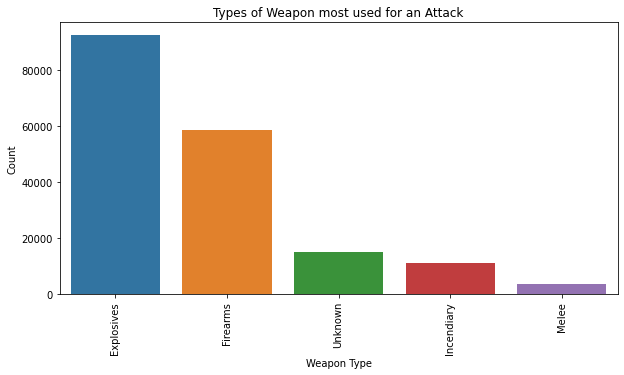

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=terror['Weapon'].value_counts()[:5].index,y=terror['Weapon'].value_counts()[:5].values)
plt.title('Types of Weapon most used for an Attack')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()